# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [6]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [10]:
# Create a newsapi client
from newsapi import NewsApiClient

In [11]:
newsapi = NewsApiClient(api_key=api_key)

In [12]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
q='bitcoin',
language='en',
sort_by='relevancy')

In [13]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
q='ethereum',
language='en',
sort_by='relevancy')

In [14]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for article in btc_headlines['articles']:
    try:
        text = article['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neg = results['neg']
        neu = results['neu']
        
        sentiments.append({
            "text":text,
            "Compound": compound,
            "Positive":pos,
            "Negative":neg,
            "Neutral":neu
        })
        
    except AttributeError:
        pass
    
btc = pd.DataFrame(sentiments)
btc.head(3)

,text,Compound,Positive,Negative,Neutral
0,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
1,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857


In [15]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []

for article in eth_headlines['articles']:
    try:
        text = article['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neg = results['neg']
        neu = results['neu']
        
        sentiments.append({
            "text":text,
            "Compound": compound,
            "Positive":pos,
            "Negative":neg,
            "Neutral":neu
        })
        
    except AttributeError:
        pass
    
eth = pd.DataFrame(sentiments)
eth.head(3)

,text,Compound,Positive,Negative,Neutral
0,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
2,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849


In [16]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.034365,0.041400,0.043100,0.915500
std,0.423814,0.062425,0.079494,0.102089
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.381800,0.000000,0.000000,0.869000
50%,0.000000,0.000000,0.000000,0.920000
75%,0.062500,0.092500,0.080000,1.000000
max,0.726400,0.178000,0.287000,1.000000


In [17]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.221595,0.068000,0.016850,0.915150
std,0.346178,0.074558,0.030824,0.080755
min,-0.381800,0.000000,0.000000,0.782000
25%,0.000000,0.000000,0.000000,0.842750
50%,0.125000,0.037500,0.000000,0.920000
75%,0.528675,0.149250,0.010250,1.000000
max,0.771700,0.194000,0.080000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [24]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [27]:
# Instantiate the lemmatizer
word_lem = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append('...')

In [38]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
   # Create a list of words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = [word.lower() for word in words]
    
    # Remove the punctuation
    words = [word for word in words if word not in punctuation]
    
    # Remove stopwords
    words = [word for word in words if word not in stop]
    
    # Lemmatize words into root words
    tokens = [word_lem.lemmatize(word) for word in words]
    
    return tokens

In [39]:
# Create a new tokens column for Bitcoin
btc['tokens'] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, supply, chain, attack, reached, thousa..."
2,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, image, gang, behind, `..."
3,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873,"[get, roundup, techcrunchs, biggest, important..."
4,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."


In [40]:
# Create a new tokens column for Ethereum
eth['tokens'] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
1,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
2,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[bitcoin, ethereum, yuriko, nakao, ether, over..."
3,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843,"[``, anthony, di, iorio, co-founder, ethereum,..."
4,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806,"[ether, holder, ``, staked, '', 13, billion, w..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [41]:
from collections import Counter
from nltk import ngrams

In [43]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()),N)
Counter(grams).most_common(20)

[(('illustration', 'taken'), 7),
 (('char', 'representation'), 6),
 (('representation', 'virtual'), 6),
 (('bitcoin', 'seen'), 6),
 (('reuters', 'bitcoin'), 6),
 (('virtual', 'currency'), 5),
 (('currency', 'bitcoin'), 5),
 (('seen', 'front'), 5),
 (('front', 'stock'), 4),
 (('stock', 'graph'), 4),
 (('graph', 'illustration'), 4),
 (('2021', 'reuters/dado'), 4),
 (('char', 'reuters'), 4),
 (('reuters', 'staff'), 4),
 (('taken', 'june'), 3),
 (('25', 'reuters'), 3),
 (('bitcoin', 'dropped'), 3),
 (('char', 'image'), 2),
 (('bitcoin', 'ethereum'), 2),
 (('2021', 'reuters/edgar'), 2)]

In [44]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()),N)
Counter(grams).most_common(20)

[(('reuters', 'bitcoin'), 5),
 (('bitcoin', 'ethereum'), 4),
 (('char', 'representation'), 4),
 (('illustration', 'taken'), 4),
 (('ethereum', 'network'), 3),
 (('cryptocurrency', 'ethereum'), 3),
 (('char', 'reuters'), 3),
 (('reuters', 'staff'), 3),
 (('25', 'reuters'), 3),
 (('bitcoin', 'dropped'), 3),
 (('taken', 'june'), 3),
 (('representation', 'virtual'), 3),
 (('bitcoin', 'seen'), 3),
 (('2021', 'reuters/dado'), 3),
 (('so-called', '“'), 2),
 (('char', 'ether'), 2),
 (('ether', 'holder'), 2),
 (('holder', '``'), 2),
 (('``', 'staked'), 2),
 (('staked', "''"), 2)]

In [45]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [46]:
# Use token_count to get the top 10 words for Bitcoin
all_words = tokenizer(btc.text.str.cat())
token_count(all_words, 10)

[('char', 20),
 ('bitcoin', 19),
 ('reuters', 12),
 ('illustration', 9),
 ('2021', 8),
 ('representation', 8),
 ('taken', 8),
 ('seen', 7),
 ('cryptocurrency', 6),
 ('virtual', 6)]

In [48]:
# Use token_count to get the top 10 words for Ethereum
all_words = tokenizer(eth.text.str.cat())
token_count(all_words, 10)

[('char', 20),
 ('bitcoin', 16),
 ('ethereum', 12),
 ('cryptocurrency', 10),
 ('reuters', 9),
 ('2021', 8),
 ('network', 6),
 ('world', 5),
 ('…', 5),
 ('june', 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [51]:
def wordcloud_generator(text, title=''):
    df = WordCloud().generate(text)
    plt.imshow(df)
    plt.axis('off')
    plt.title(title)
    plt.show()

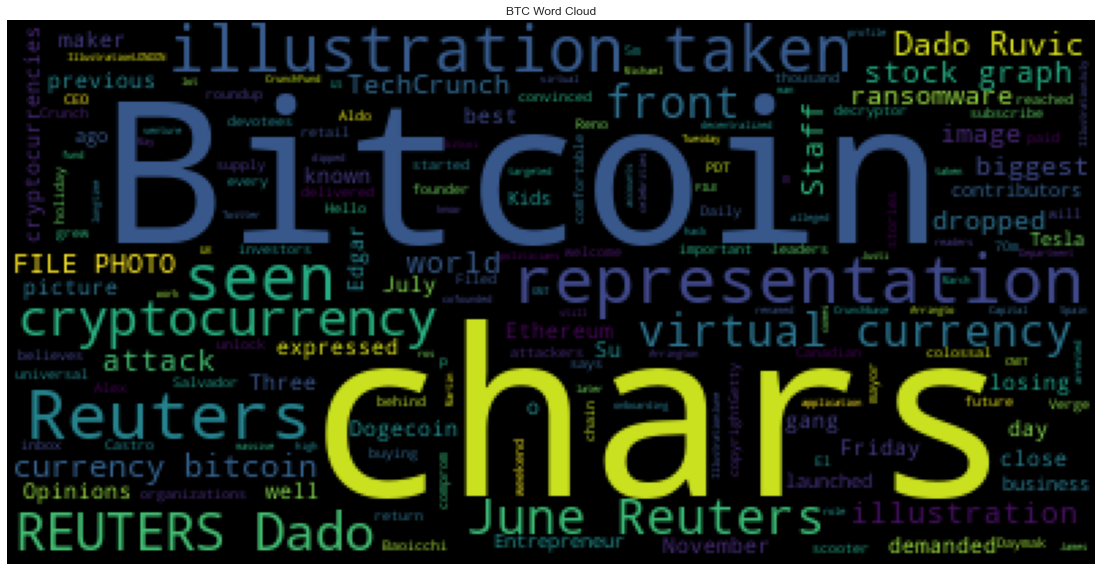

In [54]:
# Generate the Bitcoin word cloud
wordcloud_generator(btc.text.str.cat(), title='BTC Word Cloud')

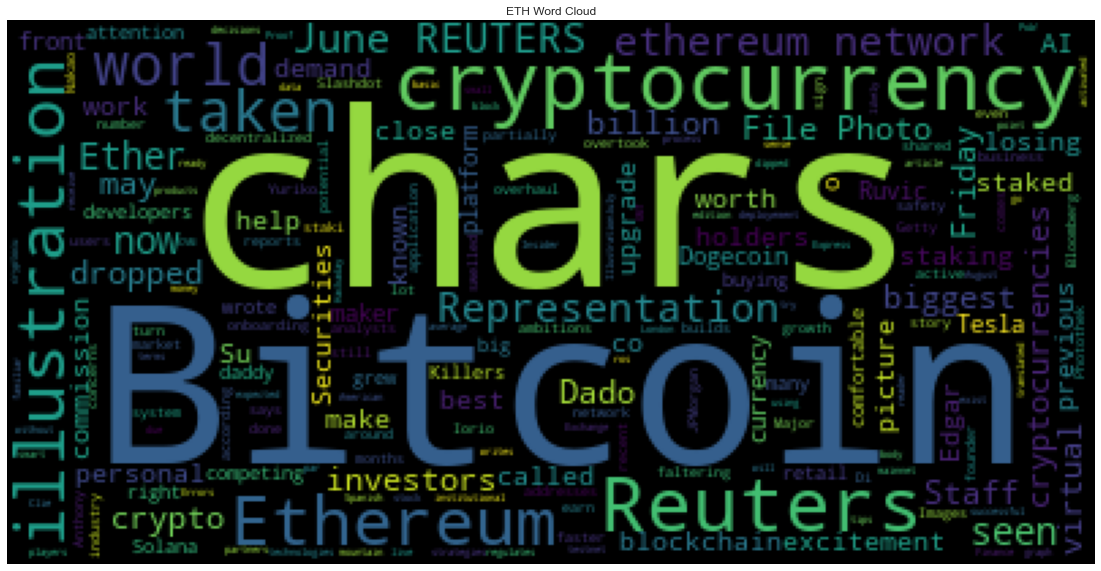

In [55]:
# Generate the Ethereum word cloud
wordcloud_generator(eth.text.str.cat(), title='ETH Word Cloud')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [56]:
import spacy
from spacy import displacy

In [58]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [59]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [60]:
# Concatenate all of the Bitcoin text together
btc_text = btc.text.str.cat()
btc_text

'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars]image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars]To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\r\nHello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application

In [61]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
doc.user_data['title'] = "Bitcoin NER"

In [64]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [65]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
$70m MONEY
£50.5m MONEY
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
March 15, 2021 DATE
REUTERS ORG
Dado Ruvic/ PERSON
June 30 DATE
Reuters ORG
June 14, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationJune 25 PERSON
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Reuters ORG
FILE ORG
June 7, 2021 DATE
REUTERS ORG
Edgar Su/Illustration/File Photo PERSON
Reuters ORG
Martin/CNET
A ORG
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
Reuters ORG
June 25 DATE
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Friday DATE
2,554.88 MONEY
50.5 CARDINAL
May 19, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Reuters ORG
5.17% PERCENT
33 MONEY
Reuters ORG
June 25 DATE
Reuters ORG
8.51% PERCENT
31,699.83 MON

---

### Ethereum NER

In [66]:
# Concatenate all of the Ethereum text together
eth_text = eth.text.str.cat()
eth_text

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world\'s biggest cryptocurrency as its co… [+2727 chars]"Anthony Di Iorio, a co-founder of the Ethereum network, says he\'s done with the cryptocurrency world, partially because of personal safety concerns," reports Bloomberg, in a story shared by Slashdot… [+1550 chars]Ether holders have "staked" more than $13 billion worth of the cryptocurrency on the ethereum 2.0 network, as excitement builds around th

In [67]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data['title'] = "ETH NER"

In [68]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [71]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
Ethereum
 ORG
Yuriko Nakao PERSON
Friday DATE
Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
more than $13 billion MONEY
2.0 CARDINAL
Photothek PERSON
more than $13 billion MONEY
2.0 CARDINAL
$40 billion MONEY
2025 DATE
JPMorgan ORG
recent months DATE
+2313 chars]Personal Finance Insider ORG
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
Reuters ORG
June 25 DATE
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Friday DATE
2,554.88 MONEY
50.5 CARDINAL
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
Reuters ORG
June 25 DATE
Reuters ORG
8.51% PERCENT
31,699.83 MONEY
22:04 GMT TIME
Friday DATE
2,937.27 MONEY
Reuters ORG
FILE ORG
June 7, 2021 DATE
REUTERS ORG
Edgar Su/Illustration/File Photo PERSON
Reuters ORG
+304 ORG
Hackaday DATE
Proof of Work WORK_OF_ART
Bitcoin, Ethereum ORG
May 19, 2021 DATE
REUTERS ORG
Dado Ruvic 

---